In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import graphviz as gv
from networkx.drawing.nx_agraph import graphviz_layout
import pandas as pd
import plotly
import numpy as np

%matplotlib inline

In [26]:
dgin=pd.read_csv('DFW_edges.tsv',sep='\t',names=['from','to','type','duration','color'])
dgin.head()

,from,to,type,duration,color
0,North_Entrance,Express_North,drive,2,black
1,Express_North,North_Entrance,drive,2,black
2,Express_North,A_exit,drive,2,black
3,A_exit,Express_North,drive,2,black
4,A_exit,B_exit,drive,2,black


In [27]:
#dgin=pd.read_csv('DFW_edges.csv',header=0,names=['from','to','type','duration','color'])
dg=nx.read_edgelist('DFW_edges.tsv',create_using=nx.MultiDiGraph(),nodetype=str,data=(('type',str),('duration',float),('color',str)))
#list(dg.nodes(data=True))

In [28]:
#nx.to_agraph(dg)

In [29]:
edges,colors=zip(*nx.get_edge_attributes(dg,'color').items())
#colors

No handles with labels found to put in legend.


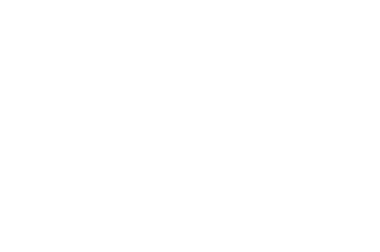

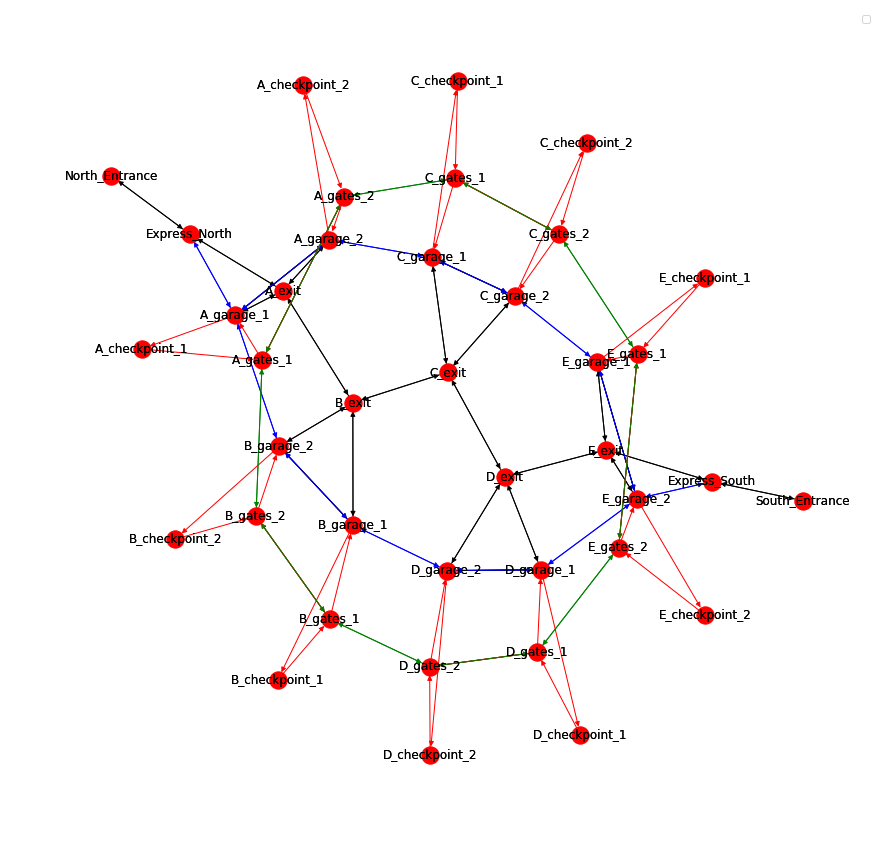

In [30]:
#posin=graphviz_layout(dg)
posin=nx.kamada_kawai_layout(dg)
plt.axis('off')
plt.figure(figsize=(15,15))
nx.draw_networkx(dg,edge_color=colors,pos=posin)
labs=list(dg.nodes())
labs=dict(zip(labs,labs))
nx.draw_networkx_labels(dg,posin,labs)
plt.axis('off')
plt.draw()
plt.legend()

In [ ]:
np.random.random(10)

In [31]:
drg=nx.DiGraph(((source, target, attr) for source, target, attr in dg.edges(data=True) if attr['type'] == 'drive'))
ing=nx.DiGraph(((source, target, attr) for source, target, attr in dg.edges(data=True) if attr['type'] != 'drive'))
ing.edges(data=True)

OutEdgeDataView([('Express_North', 'A_garage_1', {'type': 'shuttle', 'duration': 4.0, 'color': 'b'}), ('A_garage_1', 'A_garage_2', {'type': 'shuttle', 'duration': 4.0, 'color': 'b'}), ('A_garage_1', 'B_garage_2', {'type': 'shuttle', 'duration': 6.0, 'color': 'b'}), ('A_garage_1', 'Express_North', {'type': 'shuttle', 'duration': 4.0, 'color': 'b'}), ('A_garage_1', 'A_checkpoint_1', {'type': 'walk', 'duration': 3.0, 'color': 'r'}), ('Express_South', 'E_garage_2', {'type': 'shuttle', 'duration': 4.0, 'color': 'b'}), ('E_garage_2', 'E_garage_1', {'type': 'shuttle', 'duration': 4.0, 'color': 'b'}), ('E_garage_2', 'D_garage_1', {'type': 'shuttle', 'duration': 6.0, 'color': 'b'}), ('E_garage_2', 'Express_South', {'type': 'shuttle', 'duration': 4.0, 'color': 'b'}), ('E_garage_2', 'E_checkpoint_2', {'type': 'walk', 'duration': 3.0, 'color': 'r'}), ('A_garage_2', 'A_garage_1', {'type': 'shuttle', 'duration': 4.0, 'color': 'b'}), ('A_garage_2', 'C_garage_1', {'type': 'shuttle', 'duration': 6.0, '

In [32]:
nx.shortest_path(drg,source='North_Entrance',target='A_garage_1',weight='duration')

['North_Entrance', 'Express_North', 'A_exit', 'A_garage_1']

In [34]:
gar=['A_garage_1','A_garage_2','B_garage_1','B_garage_2',
 'C_garage_1','C_garage_2','D_garage_1','D_garage_2',
 'E_garage_1','E_garage_2','Express_North','Express_South']
fills=dict(zip(gar,np.random.random(len(gar))))

In [35]:
nx.set_node_attributes(dg,'fill',fills)

TypeError: unhashable type: 'dict'

In [36]:
pats=[nx.shortest_path(ing,i,'C_gates_2') for i in gar]
pats

[['A_garage_1',
  'A_garage_2',
  'C_garage_1',
  'C_garage_2',
  'C_checkpoint_2',
  'C_gates_2'],
 ['A_garage_2', 'A_checkpoint_2', 'A_gates_2', 'C_gates_1', 'C_gates_2'],
 ['B_garage_1',
  'B_garage_2',
  'A_garage_1',
  'A_checkpoint_1',
  'A_gates_1',
  'A_gates_2',
  'C_gates_1',
  'C_gates_2'],
 ['B_garage_2',
  'A_garage_1',
  'A_garage_2',
  'C_garage_1',
  'C_checkpoint_1',
  'C_gates_1',
  'C_gates_2'],
 ['C_garage_1', 'C_garage_2', 'C_checkpoint_2', 'C_gates_2'],
 ['C_garage_2', 'C_checkpoint_2', 'C_gates_2'],
 ['D_garage_1',
  'E_garage_2',
  'E_garage_1',
  'C_garage_2',
  'C_checkpoint_2',
  'C_gates_2'],
 ['D_garage_2',
  'D_garage_1',
  'E_garage_2',
  'E_garage_1',
  'C_garage_2',
  'C_checkpoint_2',
  'C_gates_2'],
 ['E_garage_1', 'C_garage_2', 'C_checkpoint_2', 'C_gates_2'],
 ['E_garage_2', 'E_garage_1', 'C_garage_2', 'C_checkpoint_2', 'C_gates_2'],
 ['Express_North',
  'A_garage_1',
  'A_garage_2',
  'C_garage_1',
  'C_garage_2',
  'C_checkpoint_2',
  'C_gates_2'],

In [ ]:
def (entry,gate):
    